<a href="https://colab.research.google.com/github/nomanGondal/Linear_regression-ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [ ]:
tips=sns.load_dataset('tips')


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

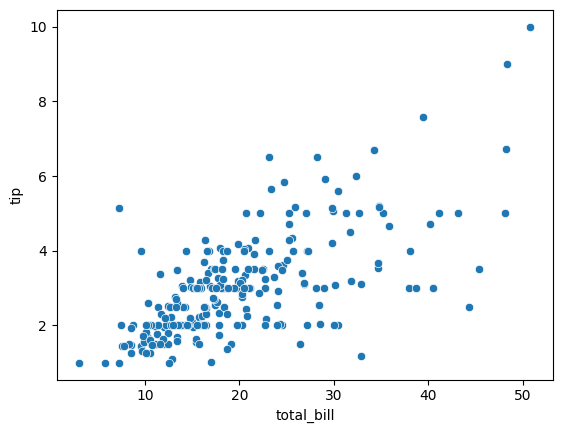

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1
tips = tips[~((tips['total_bill'] < (Q1 - 1.5 * IQR)) | (tips['total_bill'] > (Q3 + 1.5 * IQR)))]
tips = tips[tips['total_bill'] != tips['total_bill'].max()]

In [ ]:
X=tips[['total_bill']]
scaler=StandardScaler()
X=scaler.fit_transform(X)
Y=tips['tip']

In [ ]:
print(X)
print(Y)

[[-2.35075736e-01]
 [-1.14534636e+00]
 [ 3.15193122e-01]
 [ 6.80670199e-01]
 [ 8.05233547e-01]
 [ 9.01051508e-01]
 [-1.36025236e+00]
 [ 1.11869516e+00]
 [-5.01997197e-01]
 [-5.37586725e-01]
 [-1.15492815e+00]
 [ 2.26577303e+00]
 [-4.49981732e-01]
 [-3.79645032e-02]
 [-5.30742585e-01]
 [ 3.93216318e-01]
 [-1.14671519e+00]
 [-3.30893696e-01]
 [-2.37813392e-01]
 [ 2.65915314e-01]
 [-1.07774731e-01]
 [ 2.16637506e-01]
 [-4.02072752e-01]
 [ 2.83520548e+00]
 [ 1.52302589e-01]
 [-1.22831839e-01]
 [-7.30591473e-01]
 [-8.23671778e-01]
 [ 4.09642254e-01]
 [ 1.29032513e-01]
 [-1.25348377e+00]
 [-4.89151272e-02]
 [-4.99259541e-01]
 [ 2.71390626e-01]
 [-1.26938323e-01]
 [ 7.32685663e-01]
 [-3.28156040e-01]
 [-2.43288704e-01]
 [-2.37497508e-03]
 [ 1.71961065e+00]
 [-3.65114396e-01]
 [-1.70740820e-01]
 [-6.52568277e-01]
 [-1.23568901e+00]
 [ 1.60052262e+00]
 [-5.71280952e-02]
 [ 4.82190138e-01]
 [ 1.87428822e+00]
 [ 1.34728944e+00]
 [-9.13487954e-02]
 [-8.44204198e-01]
 [-1.15219050e+00]
 [ 2.2041757

In [ ]:
#just split data set and save into 4parts
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)
#return coef and value of intercept

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print('square error', mean_squared_error(Y_test,y_pred))
print('r2 score',r2_score(Y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(Y_test,y_pred)))

square error 0.7829168866690336
r2 score 0.4923197604098094
RMSE 0.8848259075485039


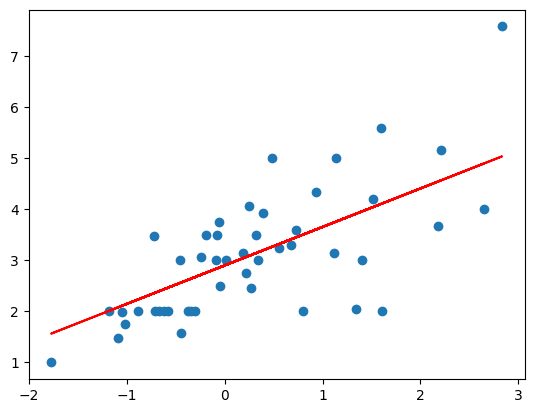

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred,color='red')
plt.show()

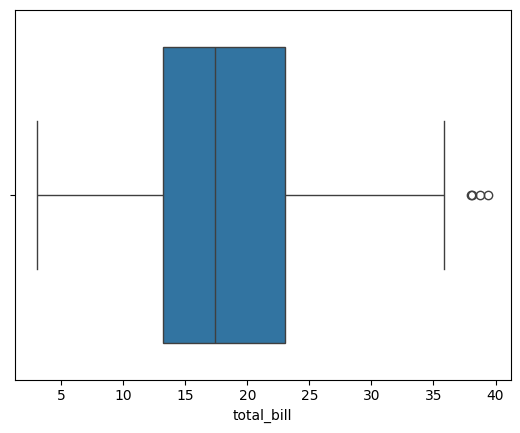

In [ ]:
sns.boxplot(x=tips['total_bill'])
plt.show()

In [ ]:
print(np.corrcoef(X.flatten(), Y))


[[1.        0.6325903]
 [0.6325903 1.       ]]


# **custom LinearregressionClass**

In [190]:
class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None       # slope (m)
        self.intercept_ = None  # intercept (b)

    def fit(self, X, y):
        """
        Fit simple linear regression for one feature.
        X : 1D or 2D numpy array of shape (n_samples,)
        y : 1D numpy array of shape (n_samples,)
        """
        X = np.array(X).flatten()   # ensure 1D
        y = np.array(y)

        # means
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        # slope (m)
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)
        self.coef_ = numerator / denominator

        # intercept (b)
        self.intercept_ = y_mean - self.coef_ * x_mean

    def predict(self, X):
        X = np.array(X).flatten()
        return self.coef_ * X + self.intercept_


In [191]:
# Sample data
X = [1, 2, 3, 4, 5, 6, 7]
y = [1.3, 1.9, 3.2, 3.9, 5.1, 5.8, 7.1]

# Train custom model
model = SimpleLinearRegression()
model.fit(X, y)

print("Slope (m):", model.coef_)
print("Intercept (b):", model.intercept_)

# Predictions
print("Pred for x=5:", model.predict([5]))
print("Pred for x=7:", model.predict([7]))


Slope (m): 0.9678571428571426
Intercept (b): 0.17142857142857215
Pred for x=5: [5.01071429]
Pred for x=7: [6.94642857]
